In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
housing = pd.read_csv("house_train.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

/var/folders/dg/cvz8h7590n1248mdbg0b0xxr0000gn/T/ipykernel_1676/1484337839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["LotArea"], kde=False);


<Axes: xlabel='LotArea'>

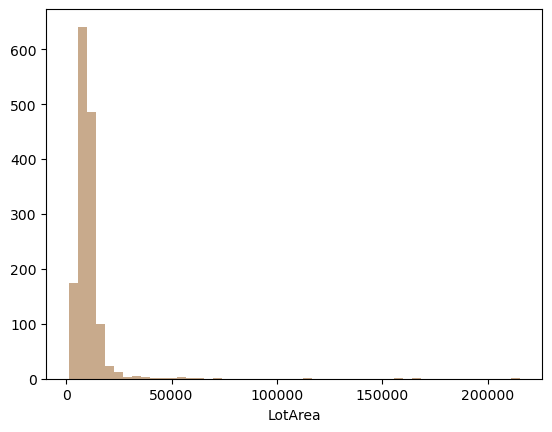

In [36]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=False);
plt.show()

/var/folders/dg/cvz8h7590n1248mdbg0b0xxr0000gn/T/ipykernel_1676/3652285437.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40);


[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'Wd Sdng'),
 Text(3, 0, 'HdBoard'),
 Text(4, 0, 'BrkFace'),
 Text(5, 0, 'WdShing'),
 Text(6, 0, 'CemntBd'),
 Text(7, 0, 'Plywood'),
 Text(8, 0, 'AsbShng'),
 Text(9, 0, 'Stucco'),
 Text(10, 0, 'BrkComm'),
 Text(11, 0, 'AsphShn'),
 Text(12, 0, 'Stone'),
 Text(13, 0, 'ImStucc'),
 Text(14, 0, 'CBlock')]

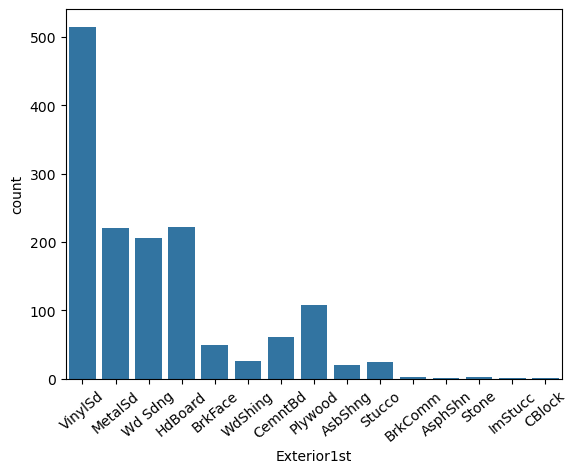

In [8]:
# What are the different types of housing exterios

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);
plt.show(plot)

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

<Axes: xlabel='LotArea', ylabel='SalePrice'>

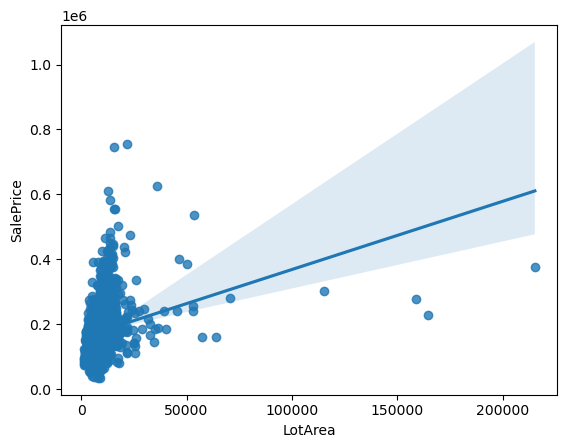

In [9]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)
plt.show()

In [10]:
# Are outliers skewing the relationship.. Redraw the relationshp after removing very large values
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

<Axes: xlabel='LotArea', ylabel='SalePrice'>

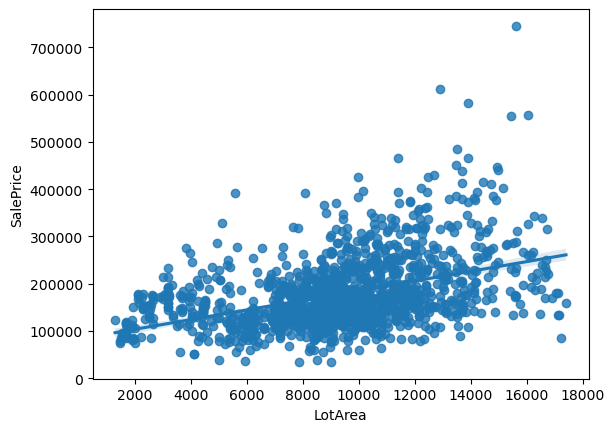

In [11]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)
plt.show()

In [12]:
housing["LotArea"].corr(housing["SalePrice"])   # calculates the Pearson correlation coefficient
housing_sub["LotArea"].corr(housing_sub["SalePrice"])

0.2638433538714056

0.43020999128977705

### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [13]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [14]:
len(sf_cols)

9

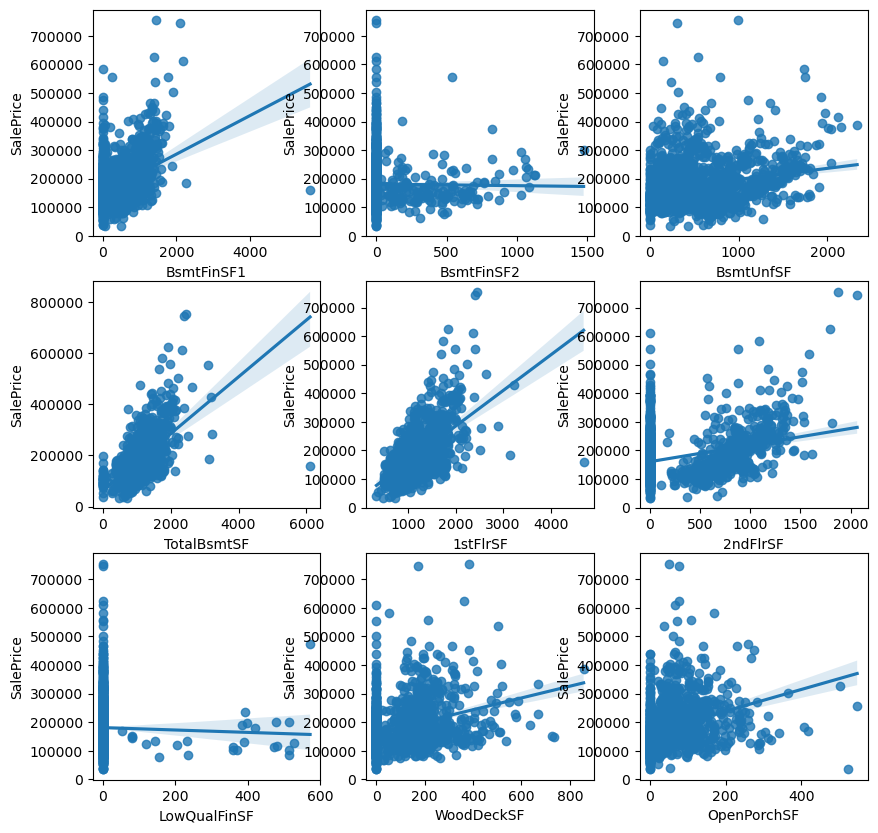

In [15]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]  # this stores [00, 01, 02, 10, 11, 12, 20, 21, 22]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)
plt.show(fig)

In [16]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

/var/folders/dg/cvz8h7590n1248mdbg0b0xxr0000gn/T/ipykernel_1676/2711310442.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40);


[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'Wd Sdng'),
 Text(3, 0, 'HdBoard'),
 Text(4, 0, 'BrkFace'),
 Text(5, 0, 'WdShing'),
 Text(6, 0, 'CemntBd'),
 Text(7, 0, 'Plywood'),
 Text(8, 0, 'AsbShng'),
 Text(9, 0, 'Stucco'),
 Text(10, 0, 'BrkComm'),
 Text(11, 0, 'AsphShn'),
 Text(12, 0, 'Stone'),
 Text(13, 0, 'ImStucc'),
 Text(14, 0, 'CBlock')]

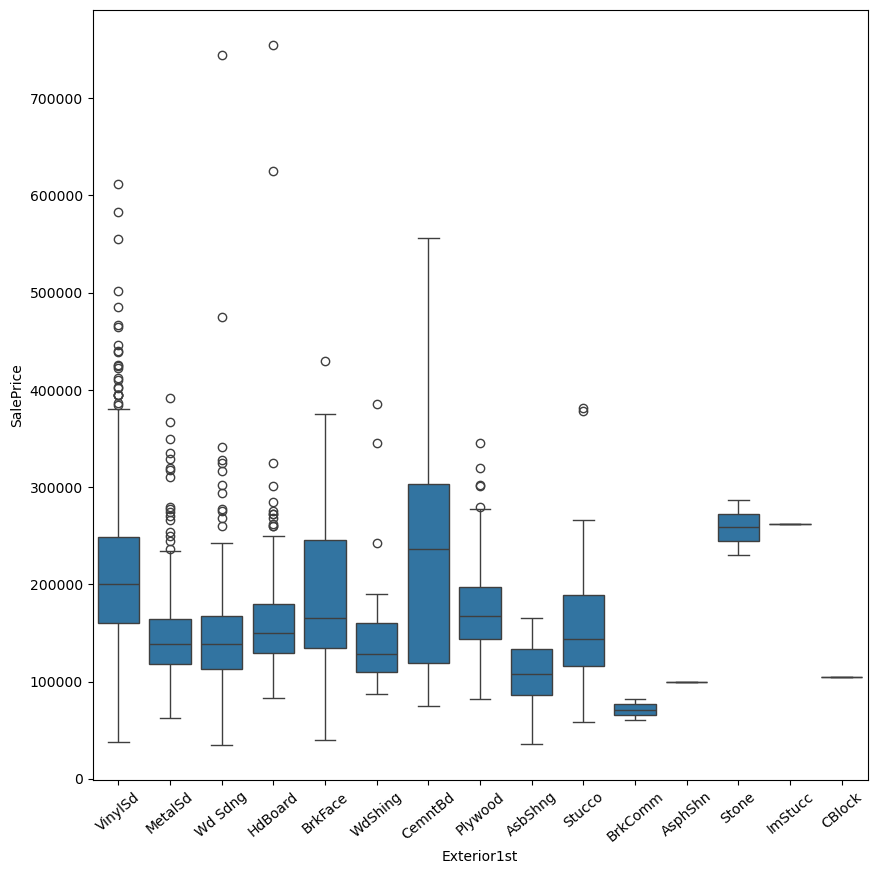

In [17]:
fig_1, axs = plt.subplots(figsize = (10,10))
plot = sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);
plt.show(fig_1)

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

In [ ]:
housing['Exterior1st'].value_counts()

In [ ]:
top_3_values = ['VinylSd', 'HdBoard', 'MetalSd']
housing['Exterior_New'] = np.where(housing['Exterior1st'].isin(top_3_values), housing['Exterior1st'],'Others')
housing

In [ ]:
sns.boxplot(x='Exterior_New', y='SalePrice', data=housing)
plt.show()

In [ ]:
housing.columns

In [ ]:
housing['Price_Change'] = np.where(housing['YearBuilt']>2000, 'New', 'Old')
sns.boxplot(x='Price_Change', y='SalePrice', data=housing)
plt.show()

In [ ]:
1

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [19]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)

In [20]:
top_3_exterior = list(top_3_exterior.index)

In [21]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")

In [22]:
housing["Exterior_new"].value_counts()

Exterior_new
VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: count, dtype: int64

/var/folders/dg/cvz8h7590n1248mdbg0b0xxr0000gn/T/ipykernel_1676/3626164457.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40);


[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'HdBoard')]

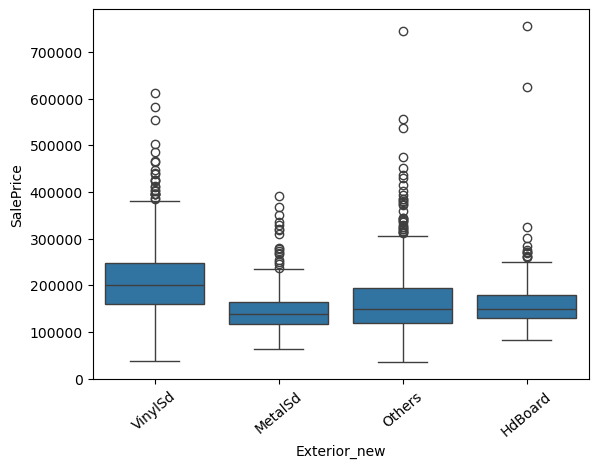

In [23]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);
plt.show()

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [24]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")

In [25]:
housing["new_house"].value_counts()

new_house
Old    1096
New     364
Name: count, dtype: int64

<Axes: xlabel='new_house', ylabel='SalePrice'>

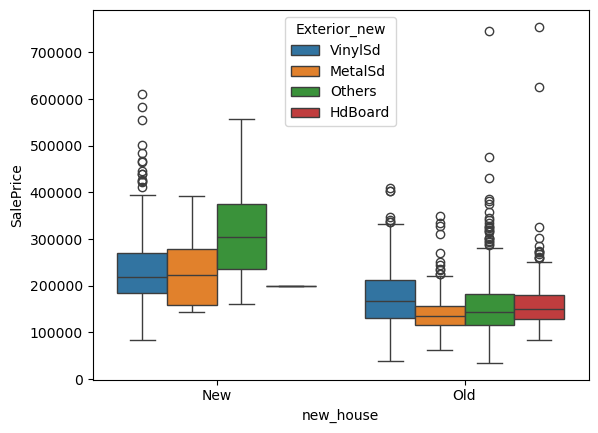

In [26]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);
plt.show()

In [27]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>



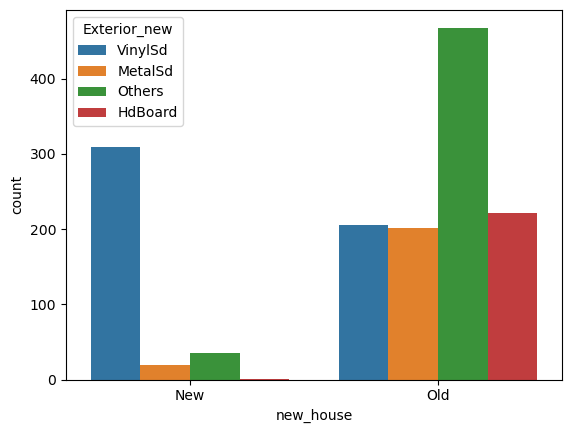

Axes(0.125,0.11;0.775x0.77)


In [34]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");
plt.show()